In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
hourly_stat = pd.read_csv('hourly_stat.csv').dropna()
#hourly_stat

In [68]:
hourly_stat['Date'] = pd.to_datetime(hourly_stat['date'])


In [69]:
hourly_stat.set_index('Date', inplace=True)

In [70]:
hourly_stat[hourly_stat['Gas_sum'] < 0] = 0

In [71]:
hourly_stat

,date,Gas_sum,Gas_max,Gas_min,Gas_mean,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,...,SH_temp_mean,SH_hum_max,SH_hum_min,SH_hum_mean,DWH_temp_max,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-08 00:00:00,2020-03-08 00:00:00,0.080621,0.048621,0.032000,0.040310,10.100000,10.100000,10.100000,83.000000,82.666667,...,20.907591,53.957879,53.204083,53.580981,21.527065,21.357708,21.442387,49.417708,48.271957,48.844832
2020-03-08 01:00:00,2020-03-08 01:00:00,0.057000,0.032333,0.024667,0.028500,10.166667,10.033333,10.100000,85.000000,84.333333,...,20.494126,54.679370,54.429973,54.554672,21.183300,21.037000,21.110150,49.971400,49.740800,49.856100
2020-03-08 02:00:00,2020-03-08 02:00:00,0.057333,0.035333,0.022000,0.028667,10.200000,10.000000,10.100000,85.666667,84.000000,...,20.487254,55.010402,54.982286,54.996344,21.039000,20.913600,20.976300,51.145600,50.464000,50.804800
2020-03-08 03:00:00,2020-03-08 03:00:00,0.072000,0.043000,0.029000,0.036000,10.100000,9.966667,10.033333,81.666667,79.333333,...,20.365186,56.348934,55.838001,56.093468,20.755000,20.529783,20.642391,50.691250,50.689130,50.690190
2020-03-08 04:00:00,2020-03-08 04:00:00,0.051333,0.027667,0.023667,0.025667,9.733333,9.466667,9.600000,75.000000,73.000000,...,20.276276,55.544823,54.731292,55.138057,20.629130,20.623750,20.626440,50.171875,50.127174,50.149524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 04:00:00,2021-03-02 04:00:00,0.043333,0.025000,0.018333,0.021667,3.200000,2.900000,3.050000,79.666667,79.333333,...,19.664339,51.411650,51.376945,51.394298,20.586957,20.469545,20.528251,48.646522,48.528409,48.587465
2021-03-02 05:00:00,2021-03-02 05:00:00,0.038667,0.020000,0.018667,0.019333,2.633333,2.633333,2.633333,79.000000,79.000000,...,19.348004,51.565290,51.544731,51.555011,20.255217,20.084783,20.170000,48.218478,48.174130,48.196304
2021-03-02 06:00:00,2021-03-02 06:00:00,0.149000,0.094667,0.054333,0.074500,2.600000,2.600000,2.600000,79.333333,79.333333,...,19.302289,51.599304,51.250863,51.425083,20.041957,18.594545,19.318251,54.542273,48.485652,51.513962


In [72]:
hourly_stat=hourly_stat.dropna()


In [73]:
hourly_stat[ 'Gas_mean'].describe()

count    8312.000000
mean        0.050271
std         0.044725
min         0.000667
25%         0.015500
50%         0.034661
75%         0.074833
max         0.240500
Name: Gas_mean, dtype: float64

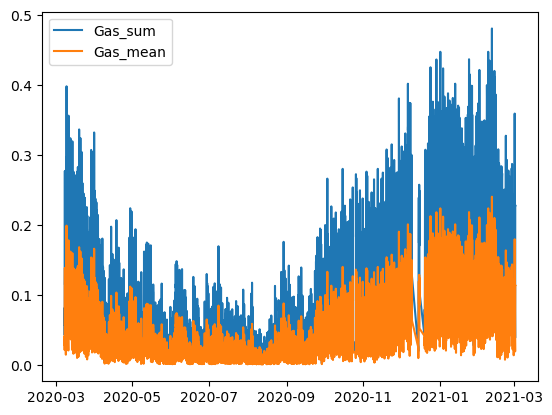

In [74]:
plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')

plt.plot(hourly_stat[ 'Gas_mean'], label='Gas_mean')

plt.legend()

plt.show()

# heating period 

In [75]:

# Define the function to classify periods
def classify_heating_period(row):
    if row['ext_temp_mean'] > 15:
        return 'DWH'
    else:
        return 'SH+DWH'



# Apply the function to create a new column
hourly_stat['Heating_Period'] = hourly_stat.apply(classify_heating_period, axis=1)

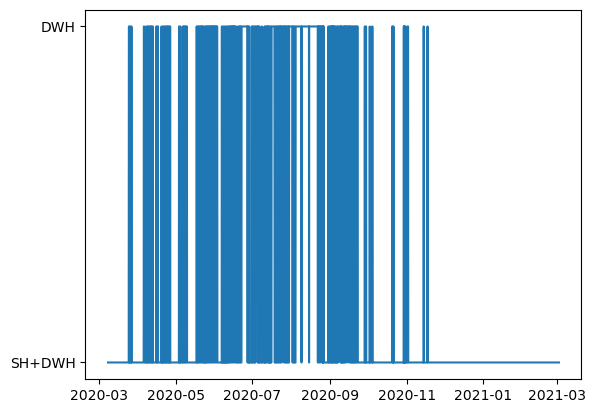

In [76]:
plt.plot(hourly_stat['Heating_Period'])
plt.show()

# find SH temp and hum difference between max and min 


In [77]:
hourly_stat['SH_temp_diff'] = hourly_stat['SH_temp_max'] - hourly_stat['SH_temp_min']
hourly_stat['SH_hum_diff'] = hourly_stat['SH_hum_max'] - hourly_stat['SH_hum_min']


# find DWH temp and hum difference between max and min 


In [78]:
hourly_stat['DWH_temp_diff'] = hourly_stat['DWH_temp_max'] - hourly_stat['DWH_temp_min']
hourly_stat['DWH_hum_diff'] = hourly_stat['DWH_hum_max'] - hourly_stat['DWH_hum_min']

hourly_stat['Gas_diff'] = hourly_stat['Gas_max'] - hourly_stat['Gas_min']



In [79]:
hourly_stat['DWH_gas_con_per_temp'] = (hourly_stat['Gas_mean']/hourly_stat['DWH_temp_mean']).replace([np.inf, -np.inf], 0)

In [80]:
hourly_stat['DWH_gas_con_per_hum'] = (hourly_stat['Gas_mean']/hourly_stat['DWH_hum_mean']).replace([np.inf, -np.inf], 0)

In [81]:
#hourly_stat

In [82]:
#hourly_stat[hourly_stat['DWH_gas_con_per_hum']==hourly_stat['DWH_gas_con_per_hum'].max()]

# find mean gas consumption for water heating period

In [83]:
water_heating_df = hourly_stat[hourly_stat['Heating_Period'] == 'DWH']


In [84]:
mean_DWH_gas_con_tem = (water_heating_df['DWH_gas_con_per_temp']).mean()

mean_DWH_gas_con_hum = water_heating_df['DWH_gas_con_per_hum'].mean()


In [85]:
#water_heating_df[water_heating_df['DWH_gas_con_per_temp']==water_heating_df['DWH_gas_con_per_temp'].max()]

In [86]:
mean_DWH_gas_con_tem

0.0008133717628332441

In [87]:
mean_DWH_gas_con_hum

0.0003107211603770263

In [88]:
#hourly_stat

In [89]:
water_heating_df['DWH_gas_con_per_temp'].describe()
water_heating_df['DWH_gas_con_per_hum'].describe()

count    2041.000000
mean        0.000311
std         0.000251
min         0.000010
25%         0.000135
50%         0.000258
75%         0.000420
max         0.002022
Name: DWH_gas_con_per_hum, dtype: float64

In [90]:
hourly_stat['est_gas_con_DWH_temp']= hourly_stat['DWH_temp_mean'] * mean_DWH_gas_con_tem
hourly_stat['est_gas_con_DWH_hum']= hourly_stat['DWH_hum_mean'] * mean_DWH_gas_con_hum
hourly_stat['est_gas_con_DWH']= (hourly_stat['est_gas_con_DWH_hum']+hourly_stat['est_gas_con_DWH_temp'])/2


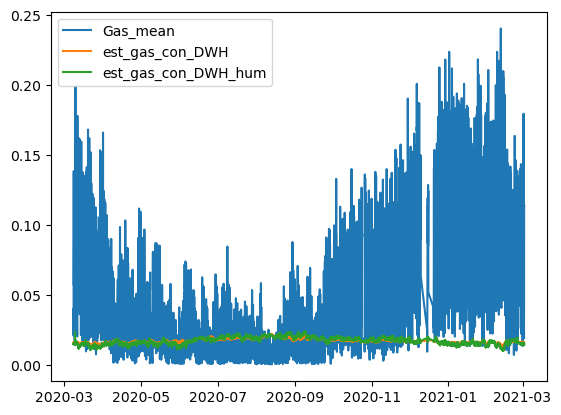

In [91]:
#plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')
plt.plot(hourly_stat[ 'Gas_mean'], label='Gas_mean')
plt.plot(hourly_stat[ 'est_gas_con_DWH'], label='est_gas_con_DWH')
plt.plot(hourly_stat[ 'est_gas_con_DWH_hum'], label='est_gas_con_DWH_hum')

plt.legend()

plt.show()

# METHOD 1 USING GAS PER TEMP AND HUM  ESTIMATE SH GAS 

In [92]:
hourly_stat['SH_temp_diff'] = hourly_stat['SH_temp_max'] - hourly_stat['SH_temp_min']
hourly_stat['SH_hum_diff'] = hourly_stat['SH_hum_max'] - hourly_stat['SH_hum_min']


In [93]:
hourly_stat['est_gas_con_SH_temp']= hourly_stat['SH_temp_mean'] * mean_DWH_gas_con_tem
hourly_stat['est_gas_con_SH_hum']= hourly_stat['SH_hum_mean'] * mean_DWH_gas_con_hum
hourly_stat['est_gas_con_SH1']= (hourly_stat['est_gas_con_SH_hum']+hourly_stat['est_gas_con_SH_temp'])/2


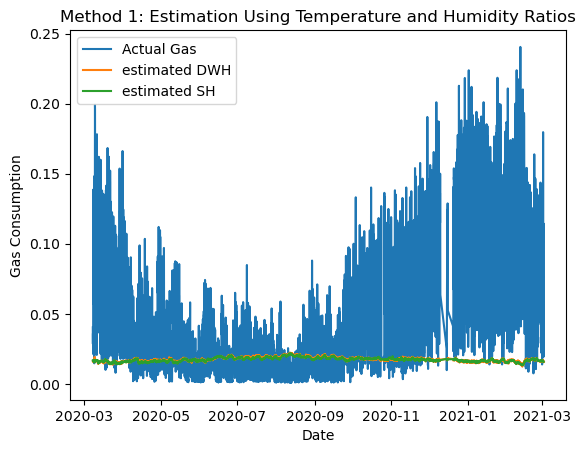

In [94]:
#plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')
plt.plot(hourly_stat[ 'Gas_mean'], label='Actual Gas')
plt.plot(hourly_stat[ 'est_gas_con_DWH'], label='estimated DWH')
plt.plot(hourly_stat[ 'est_gas_con_SH1'], label='estimated SH')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Method 1: Estimation Using Temperature and Humidity Ratios')
plt.legend()

plt.show()

In [95]:
hourly_stat['estimated_gas_con1']= hourly_stat[ 'est_gas_con_SH1']+hourly_stat[ 'est_gas_con_DWH']

In [96]:
hourly_stat['estimated_gas_con1']

Date
2020-03-08 00:00:00    0.033136
2020-03-08 01:00:00    0.033141
2020-03-08 02:00:00    0.033300
2020-03-08 03:00:00    0.033267
2020-03-08 04:00:00    0.032992
                         ...   
2021-03-02 04:00:00    0.031879
2021-03-02 05:00:00    0.031569
2021-03-02 06:00:00    0.031699
2021-03-02 07:00:00    0.031612
2021-03-02 08:00:00    0.031449
Name: estimated_gas_con1, Length: 8312, dtype: float64

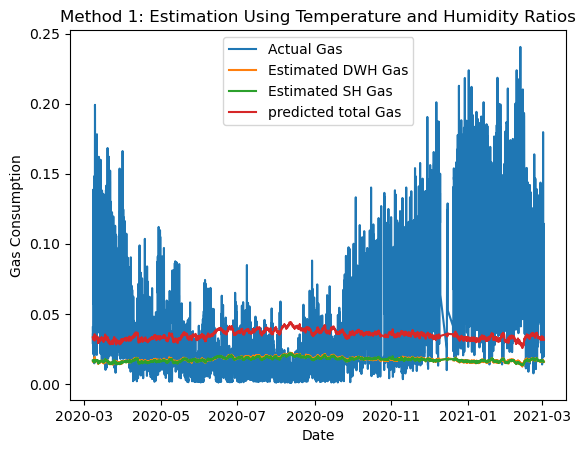

In [97]:
#plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')
plt.plot(hourly_stat[ 'Gas_mean'], label='Actual Gas')
plt.plot(hourly_stat[ 'est_gas_con_DWH'], label='Estimated DWH Gas')
plt.plot(hourly_stat[ 'est_gas_con_SH1'], label='Estimated SH Gas')
plt.plot(hourly_stat[ 'estimated_gas_con1'], label='predicted total Gas')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Method 1: Estimation Using Temperature and Humidity Ratios')
plt.legend()
#plt.plot(hourly_stat[ 'est_gas_con_SH1'], label='est_gas_con_SH1')

plt.legend()

plt.show()

In [98]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_model_1_total = mean_absolute_error(hourly_stat['Gas_mean'], hourly_stat['estimated_gas_con1'])
mse_model_1_total = mean_squared_error(hourly_stat['Gas_mean'], hourly_stat['estimated_gas_con1'])
rmse_model_1_total = math.sqrt(mse_model_1_total)
r2_model_1_total = r2_score(hourly_stat['Gas_mean'], hourly_stat['estimated_gas_con1'])
n = len(hourly_stat['Gas_mean'])
p = 1  # Assuming 'predicted_total_gas' is a single column (hence one predictor)
adjusted_r2_model_1_total = 1 - (1 - r2_model_1_total) * (n - 1) / (n - p - 1)
mape_model_1_total = mean_absolute_percentage_error(hourly_stat['Gas_mean'], hourly_stat['estimated_gas_con1'])

print(f'Mean Squared Error (MSE): {mse_model_1_total}')
print(f'Root Mean Squared Error (RMSE): {rmse_model_1_total}')
print(f'R-squared (R²): {r2_model_1_total}')
print(f'Adjusted R-squared (R²): {adjusted_r2_model_1_total}')
print(f'Mean Absolute Error (MAE): {mae_model_1_total}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_model_1_total * 100}%')

Mean Squared Error (MSE): 0.0023784205084188383
Root Mean Squared Error (RMSE): 0.04876905277344269
R-squared (R²): -0.18918230591985874
Adjusted R-squared (R²): -0.1893254084837479
Mean Absolute Error (MAE): 0.03554351662935541
Mean Absolute Percentage Error (MAPE): 202.88996171632334%


In [99]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_model_1_SH = mean_absolute_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_SH1'])
mse_model_1_SH = mean_squared_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_SH1'])
rmse_model_1_SH = math.sqrt(mse_model_1_SH)
r2_model_1_SH = r2_score(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_SH1'])
n = len(hourly_stat['Gas_mean'])
p = 1  # Assuming 'predicted_SH_gas' is a single column (hence one predictor)
adjusted_r2_model_1_SH = 1 - (1 - r2_model_1_SH) * (n - 1) / (n - p - 1)
mape_model_1_SH = mean_absolute_percentage_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_SH1'])

print(f'Mean Squared Error (MSE): {mse_model_1_SH}')
print(f'Root Mean Squared Error (RMSE): {rmse_model_1_SH}')
print(f'R-squared (R²): {r2_model_1_SH}')
print(f'Adjusted R-squared (R²): {adjusted_r2_model_1_SH}')
print(f'Mean Absolute Error (MAE): {mae_model_1_SH}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_model_1_SH * 100}%')

Mean Squared Error (MSE): 0.003149016412881528
Root Mean Squared Error (RMSE): 0.05611609762698693
R-squared (R²): -0.5744712030503938
Adjusted R-squared (R²): -0.5746606701025057
Mean Absolute Error (MAE): 0.03818465892220673
Mean Absolute Percentage Error (MAPE): 112.88893403803952%


In [100]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_model_1_DWH = mean_absolute_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_DWH'])
mse_model_1_DWH = mean_squared_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_DWH'])
rmse_model_1_DWH = math.sqrt(mse_model_1_DWH)
r2_model_1_DWH = r2_score(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_DWH'])
n = len(hourly_stat['Gas_mean'])
p = 1  # Assuming 'predicted_DWH_gas' is a single column (hence one predictor)
adjusted_r2_model_1_DWH = 1 - (1 - r2_model_1_DWH) * (n - 1) / (n - p - 1)
mape_model_1_DWH = mean_absolute_percentage_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_DWH'])

print(f'Mean Squared Error (MSE): {mse_model_1_DWH}')
print(f'Root Mean Squared Error (RMSE): {rmse_model_1_DWH}')
print(f'R-squared (R²): {r2_model_1_DWH}')
print(f'Adjusted R-squared (R²): {adjusted_r2_model_1_DWH}')
print(f'Mean Absolute Error (MAE): {mae_model_1_DWH}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_model_1_DWH * 100}%')

Mean Squared Error (MSE): 0.003144392732549904
Root Mean Squared Error (RMSE): 0.056074885042681134
R-squared (R²): -0.5721594172164193
Adjusted R-squared (R²): -0.57234860607529
Mean Absolute Error (MAE): 0.038176984711729846
Mean Absolute Percentage Error (MAPE): 114.35036289764473%


In [101]:
#hourly_stat

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [103]:

# Calculate MAE
mae = mean_absolute_error(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con1'])
print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 0.07632293263671332


In [104]:
# Calculate MSE
mse = mean_squared_error(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con1'])
print(f'Mean Squared Error (MSE): {mse}')



Mean Squared Error (MSE): 0.012583047208116172


In [105]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 0.11217418244906523


In [106]:

# Calculate MAPE
mape = np.mean(np.abs((hourly_stat[ 'Gas_sum'] - hourly_stat['estimated_gas_con1']) / hourly_stat[ 'Gas_sum'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}')



Mean Absolute Percentage Error (MAPE): 113.59099108642907


In [107]:
# Calculate R-squared
r2 = r2_score(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con1'])
print(f'R-squared (R^2): {r2}')

R-squared (R^2): -0.5723949188308515


# METHOD 2 GAS - DWH ESTIMATE

In [108]:
hourly_stat['est_gas_con_SH2']=hourly_stat['Gas_mean']- hourly_stat['est_gas_con_DWH']


In [109]:
#hourly_stat

In [110]:
hourly_stat['est_gas_con_SH2_0'] = np.abs(hourly_stat['est_gas_con_SH2'] )

In [111]:
#hourly_stat

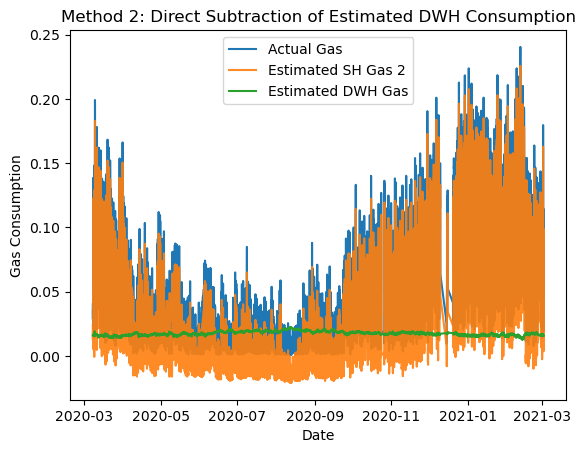

In [112]:



#plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')
plt.plot(hourly_stat[ 'Gas_mean'], label='Actual Gas')

plt.plot(hourly_stat[ 'est_gas_con_SH2'], label='Estimated SH Gas 2',alpha=0.9 )
plt.plot(hourly_stat[ 'est_gas_con_DWH'], label='Estimated DWH Gas')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Method 2: Direct Subtraction of Estimated DWH Consumption')
plt.legend()
#plt.plot(hourly_stat[ 'est_gas_con_SH1'], label='est_gas_con_SH1')

plt.legend()

plt.show()

In [113]:
hourly_stat['estimated_gas_con2']= hourly_stat[ 'est_gas_con_SH2']+hourly_stat[ 'est_gas_con_DWH']

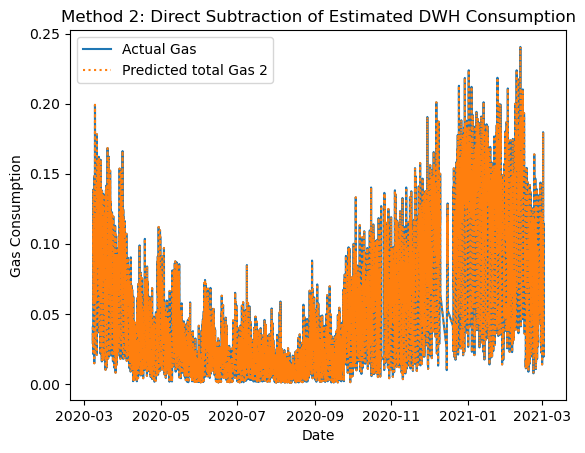

In [114]:



#plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')
plt.plot(hourly_stat[ 'Gas_mean'], label='Actual Gas')
plt.plot(hourly_stat['estimated_gas_con2'], label='Predicted total Gas 2',linestyle=':')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Method 2: Direct Subtraction of Estimated DWH Consumption')
plt.legend()
#plt.plot(hourly_stat[ 'est_gas_con_SH1'], label='est_gas_con_SH1')

plt.legend()

plt.show()

In [115]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_model_2_total = mean_absolute_error(hourly_stat['Gas_mean'], hourly_stat['estimated_gas_con2'])
mse_model_2_total = mean_squared_error(hourly_stat['Gas_mean'], hourly_stat['estimated_gas_con2'])
rmse_model_2_total = math.sqrt(mse_model_2_total)
r2_model_2_total = r2_score(hourly_stat['Gas_mean'], hourly_stat['estimated_gas_con2'])
n = len(hourly_stat['Gas_mean'])
p = 1  # Assuming 'predicted_total_gas' is a single column (hence one predictor)
adjusted_r2_model_2_total = 1 - (1 - r2_model_2_total) * (n - 1) / (n - p - 1)
mape_model_2_total = mean_absolute_percentage_error(hourly_stat['Gas_mean'], hourly_stat['estimated_gas_con2'])

print(f'Mean Squared Error (MSE): {mse_model_2_total}')
print(f'Root Mean Squared Error (RMSE): {rmse_model_2_total}')
print(f'R-squared (R²): {r2_model_2_total}')
print(f'Adjusted R-squared (R²): {adjusted_r2_model_2_total}')
print(f'Mean Absolute Error (MAE): {mae_model_2_total}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_model_2_total * 100}%')

Mean Squared Error (MSE): 9.077370458123788e-36
Root Mean Squared Error (RMSE): 3.0128674810093767e-18
R-squared (R²): 1.0
Adjusted R-squared (R²): 1.0
Mean Absolute Error (MAE): 6.481212409343088e-19
Mean Absolute Percentage Error (MAPE): 3.629231468029242e-15%


In [116]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_model_2_SH = mean_absolute_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_SH2'])
mse_model_2_SH = mean_squared_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_SH2'])
rmse_model_2_SH = math.sqrt(mse_model_2_SH)
r2_model_2_SH = r2_score(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_SH2'])
n = len(hourly_stat['Gas_mean'])
p = 1  # Assuming 'predicted_SH_gas' is a single column (hence one predictor)
adjusted_r2_model_2_SH = 1 - (1 - r2_model_2_SH) * (n - 1) / (n - p - 1)
mape_model_2_SH = mean_absolute_percentage_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_SH2'])

print(f'Mean Squared Error (MSE): {mse_model_2_SH}')
print(f'Root Mean Squared Error (RMSE): {rmse_model_2_SH}')
print(f'R-squared (R²): {r2_model_2_SH}')
print(f'Adjusted R-squared (R²): {adjusted_r2_model_2_SH}')
print(f'Mean Absolute Error (MAE): {mae_model_2_SH}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_model_2_SH * 100}%')

Mean Squared Error (MSE): 0.00030998251412783296
Root Mean Squared Error (RMSE): 0.01760632028925502
R-squared (R²): 0.8450123854715531
Adjusted R-squared (R²): 0.8449937347357495
Mean Absolute Error (MAE): 0.017534474840401784
Mean Absolute Percentage Error (MAPE): 127.1145636249029%


In [117]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_model_2_DWH = mean_absolute_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_DWH'])
mse_model_2_DWH = mean_squared_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_DWH'])
rmse_model_2_DWH = math.sqrt(mse_model_2_DWH)
r2_model_2_DWH = r2_score(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_DWH'])
n = len(hourly_stat['Gas_mean'])
p = 1  # Assuming 'predicted_SH_gas' is a single column (hence one predictor)
adjusted_r2_model_2_DWH = 1 - (1 - r2_model_2_DWH) * (n - 1) / (n - p - 1)
mape_model_2_DWH = mean_absolute_percentage_error(hourly_stat['Gas_mean'], hourly_stat['est_gas_con_DWH'])

print(f'Mean Squared Error (MSE): {mse_model_2_DWH}')
print(f'Root Mean Squared Error (RMSE): {rmse_model_2_DWH}')
print(f'R-squared (R²): {r2_model_2_DWH}')
print(f'Adjusted R-squared (R²): {adjusted_r2_model_2_DWH}')
print(f'Mean Absolute Error (MAE): {mae_model_2_DWH}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_model_2_DWH * 100}%')

Mean Squared Error (MSE): 0.003144392732549904
Root Mean Squared Error (RMSE): 0.056074885042681134
R-squared (R²): -0.5721594172164193
Adjusted R-squared (R²): -0.57234860607529
Mean Absolute Error (MAE): 0.038176984711729846
Mean Absolute Percentage Error (MAPE): 114.35036289764473%


In [118]:
hourly_stat.replace([np.inf, -np.inf], np.nan, inplace=True)

In [119]:
hourly_stat.dropna(inplace=True)


In [120]:
#hourly_stat

In [121]:

# Calculate MAE
mae = mean_absolute_error(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con2'])
print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 0.050227706816148826


In [122]:
# Calculate MSE
mse = mean_squared_error(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con2'])
print(f'Mean Squared Error (MSE): {mse}')



Mean Squared Error (MSE): 0.0045250949569651845


In [123]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 0.06726882604122941


In [124]:

# Calculate MAPE
mape = np.mean(np.abs((hourly_stat[ 'Gas_sum'] - hourly_stat['estimated_gas_con2']) / hourly_stat[ 'Gas_sum'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}')



Mean Absolute Percentage Error (MAPE): 49.9458614051974


In [125]:
# Calculate R-squared
r2 = r2_score(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con2'])
print(f'R-squared (R^2): {r2}')

R-squared (R^2): 0.43453789850126456


In [126]:
hourly_stat.dtypes

date                     object
Gas_sum                 float64
Gas_max                 float64
Gas_min                 float64
Gas_mean                float64
ext_temp_max            float64
ext_temp_min            float64
ext_temp_mean           float64
ext_hum_max             float64
ext_hum_min             float64
ext_hum_mean            float64
SH_temp_max             float64
SH_temp_min             float64
SH_temp_mean            float64
SH_hum_max              float64
SH_hum_min              float64
SH_hum_mean             float64
DWH_temp_max            float64
DWH_temp_min            float64
DWH_temp_mean           float64
DWH_hum_max             float64
DWH_hum_min             float64
DWH_hum_mean            float64
Heating_Period           object
SH_temp_diff            float64
SH_hum_diff             float64
DWH_temp_diff           float64
DWH_hum_diff            float64
Gas_diff                float64
DWH_gas_con_per_temp    float64
DWH_gas_con_per_hum     float64
est_gas_

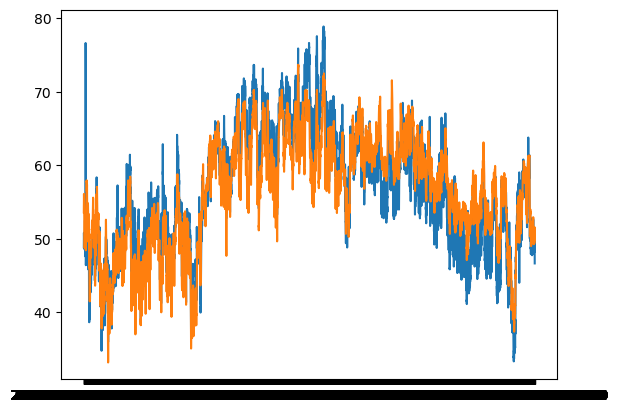

In [127]:
plt.plot(hourly_stat['date'],hourly_stat['DWH_hum_mean'])
plt.plot(hourly_stat['date'],hourly_stat['SH_hum_mean'])
#plt.plot(hourly_stat['Date'],hourly_stat['ext_hum_mean'])

plt.show()

# using dwh humidity to find period of sh gas consumption 

In [128]:
sh_gas_con = hourly_stat[hourly_stat['DWH_hum_mean']<50]

In [129]:
sh_gas_con['Heating_Period'] == 'SH+DWH'

Date
2020-03-08 00:00:00    True
2020-03-08 01:00:00    True
2020-03-08 05:00:00    True
2020-03-08 06:00:00    True
2020-03-08 07:00:00    True
                       ... 
2021-03-02 03:00:00    True
2021-03-02 04:00:00    True
2021-03-02 05:00:00    True
2021-03-02 07:00:00    True
2021-03-02 08:00:00    True
Name: Heating_Period, Length: 2214, dtype: bool

In [130]:
sh_dwh_gas_con = sh_gas_con[sh_gas_con['Heating_Period'] =='SH+DWH']

In [131]:
sh_gas_per_hum=(sh_dwh_gas_con['Gas_mean']/sh_dwh_gas_con['SH_hum_mean'])

In [132]:
sh_gas_per_hum

Date
2020-03-08 00:00:00    0.000752
2020-03-08 01:00:00    0.000522
2020-03-08 05:00:00    0.000391
2020-03-08 06:00:00    0.000588
2020-03-08 07:00:00    0.001511
                         ...   
2021-03-02 03:00:00    0.000494
2021-03-02 04:00:00    0.000422
2021-03-02 05:00:00    0.000375
2021-03-02 07:00:00    0.002263
2021-03-02 08:00:00    0.002304
Length: 1970, dtype: float64

In [133]:
est_sh_hum_gas=hourly_stat['SH_hum_mean']*sh_gas_per_hum 

In [134]:
hourly_stat['est_sh_hum_gas']=est_sh_hum_gas
hourly_stat['est_sh_hum_gas']

Date
2020-03-08 00:00:00    0.040310
2020-03-08 01:00:00    0.028500
2020-03-08 02:00:00         NaN
2020-03-08 03:00:00         NaN
2020-03-08 04:00:00         NaN
                         ...   
2021-03-02 04:00:00    0.021667
2021-03-02 05:00:00    0.019333
2021-03-02 06:00:00         NaN
2021-03-02 07:00:00    0.114333
2021-03-02 08:00:00    0.114000
Name: est_sh_hum_gas, Length: 8312, dtype: float64

In [135]:
sh_dwh_gas_con=sh_dwh_gas_con[sh_dwh_gas_con['Gas_sum']<1]

In [136]:
sh_gas_per_temp = (sh_dwh_gas_con['Gas_sum']/sh_dwh_gas_con['SH_temp_mean']).mean()

In [137]:
est_sh_temp_gas=hourly_stat['SH_temp_mean']*sh_gas_per_temp 

In [138]:
hourly_stat['est_sh_temp_gas']=est_sh_temp_gas

In [139]:
est_sh_gas = (est_sh_temp_gas+est_sh_hum_gas)/2

In [140]:
hourly_stat['est_sh_gas']=est_sh_gas

In [141]:
#sh_gas_con['Heating_Period'] == 'DWH'
hourly_stat['est_sh_gas'] 

Date
2020-03-08 00:00:00    0.106229
2020-03-08 01:00:00    0.098621
2020-03-08 02:00:00         NaN
2020-03-08 03:00:00         NaN
2020-03-08 04:00:00         NaN
                         ...   
2021-03-02 04:00:00    0.091788
2021-03-02 05:00:00    0.089319
2021-03-02 06:00:00         NaN
2021-03-02 07:00:00    0.138476
2021-03-02 08:00:00    0.139027
Name: est_sh_gas, Length: 8312, dtype: float64

In [142]:
#hourly_stat.loc[hourly_stat['Heating_Period'] == 'DWH', 'est_sh_gas'] = 0
hourly_stat[hourly_stat['est_sh_gas'].isna()==True]=0


In [143]:
hourly_stat['est_sh_gas'].describe()

count    8312.000000
mean        0.028959
std         0.053288
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.200543
Name: est_sh_gas, dtype: float64

In [144]:
#gas = hourly_stat[hourly_stat['Gas_sum'] <1]

In [145]:
dwh_gas_con = hourly_stat[hourly_stat['DWH_hum_mean']>50]

In [146]:
dwh_gas_con

,date,Gas_sum,Gas_max,Gas_min,Gas_mean,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,...,est_gas_con_SH_temp,est_gas_con_SH_hum,est_gas_con_SH1,estimated_gas_con1,est_gas_con_SH2,est_gas_con_SH2_0,estimated_gas_con2,est_sh_hum_gas,est_sh_temp_gas,est_sh_gas
Date,,,,,,,,,,,,,,,,,,,,,


In [147]:
dwh_gas_per_hum=((dwh_gas_con['Gas_mean'])/dwh_gas_con['DWH_hum_mean'])

In [148]:
dwh_gas_per_hum2=((dwh_gas_con['Gas_mean']-hourly_stat['est_sh_gas'])/dwh_gas_con['DWH_hum_mean'])

In [149]:
est_dwh_hum_gas=hourly_stat['DWH_hum_mean']* dwh_gas_per_hum

In [150]:
hourly_stat['est_dwh_hum_gas']=est_dwh_hum_gas

In [151]:
hourly_stat['est_gas_3']=hourly_stat['est_sh_gas']+hourly_stat['est_gas_con_DWH']

In [152]:
total_est_gas = hourly_stat['est_dwh_hum_gas']+hourly_stat['est_sh_gas']

In [153]:
hourly_stat['total_est_gas3']=total_est_gas

In [154]:
hourly_stat['Gas_mean']

Date
2020-03-08 00:00:00    0.040310
2020-03-08 01:00:00    0.028500
2020-03-08 02:00:00    0.000000
2020-03-08 03:00:00    0.000000
2020-03-08 04:00:00    0.000000
                         ...   
2021-03-02 04:00:00    0.021667
2021-03-02 05:00:00    0.019333
2021-03-02 06:00:00    0.000000
2021-03-02 07:00:00    0.114333
2021-03-02 08:00:00    0.114000
Name: Gas_mean, Length: 8312, dtype: float64

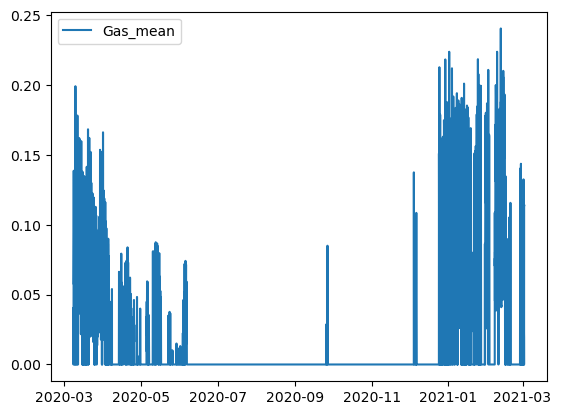

In [155]:
#plt.plot(hourly_stat['Date'],hourly_stat['Gas_mean'], label='estimated_gas_con2')
#plt.plot(hourly_stat['Date'],est_sh_temp_gas)
#plt.plot(hourly_stat['Date'],est_sh_hum_gas)
#plt.plot(hourly_stat['Date'],hourly_stat['Heating_Period'])
plt.plot(hourly_stat['Gas_mean'], label='Gas_mean')

#plt.plot(hourly_stat['date'],hourly_stat['est_gas_con_DWH'], label='est_gas_con_DWH')
#plt.plot(est_dwh_temp_gas, label='est_gas_con_DWH')
#plt.plot(hourly_stat['est_sh_gas'], label='est_sh_gas')

#plt.plot(hourly_stat['Date'],hourly_stat['est_gas_con_DWH'])
plt.legend()

plt.show()

In [156]:
hourly_stat[hourly_stat['est_dwh_hum_gas'].isna()==True]=0
hourly_stat['est_dwh_hum_gas']

Date
2020-03-08 00:00:00    0.0
2020-03-08 01:00:00    0.0
2020-03-08 02:00:00    0.0
2020-03-08 03:00:00    0.0
2020-03-08 04:00:00    0.0
                      ... 
2021-03-02 04:00:00    0.0
2021-03-02 05:00:00    0.0
2021-03-02 06:00:00    0.0
2021-03-02 07:00:00    0.0
2021-03-02 08:00:00    0.0
Name: est_dwh_hum_gas, Length: 8312, dtype: float64

In [157]:
hourly_stat[hourly_stat['est_sh_gas'].isna()==True]=0
hourly_stat['est_sh_gas']

Date
2020-03-08 00:00:00    0.0
2020-03-08 01:00:00    0.0
2020-03-08 02:00:00    0.0
2020-03-08 03:00:00    0.0
2020-03-08 04:00:00    0.0
                      ... 
2021-03-02 04:00:00    0.0
2021-03-02 05:00:00    0.0
2021-03-02 06:00:00    0.0
2021-03-02 07:00:00    0.0
2021-03-02 08:00:00    0.0
Name: est_sh_gas, Length: 8312, dtype: float64

In [158]:
est_gas_con_3 = hourly_stat['est_dwh_hum_gas']+hourly_stat['est_sh_gas']
est_gas_con_3

Date
2020-03-08 00:00:00    0.0
2020-03-08 01:00:00    0.0
2020-03-08 02:00:00    0.0
2020-03-08 03:00:00    0.0
2020-03-08 04:00:00    0.0
                      ... 
2021-03-02 04:00:00    0.0
2021-03-02 05:00:00    0.0
2021-03-02 06:00:00    0.0
2021-03-02 07:00:00    0.0
2021-03-02 08:00:00    0.0
Length: 8312, dtype: float64

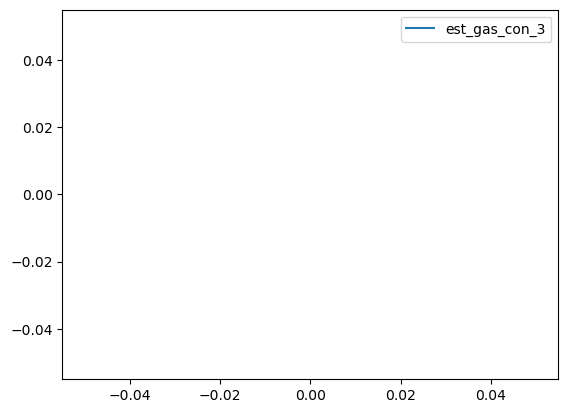

In [159]:
#plt.plot(hourly_stat['date'],hourly_stat['Gas_mean'] ,label='Gas_mean')
plt.plot(hourly_stat['date'],est_gas_con_3, label='est_gas_con_3')
#plt.plot(hourly_stat['Date'],hourly_stat['est_gas_con_DWH'])
plt.legend()
plt.show()

In [160]:
 hourly_stat['est_gas_3']= hourly_stat['est_gas_3'].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\haochen shi\AppData\Local\Temp\ipykernel_27356\3799891691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hourly_stat['est_gas_3']= hourly_stat['est_gas_3'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [161]:

# Calculate MAE
mae = mean_absolute_error(hourly_stat[ 'Gas_mean'], hourly_stat['est_gas_3'])
print(f'Mean Absolute Error (MAE): {mae}')



ValueError: Input contains NaN.

In [ ]:
# Calculate MSE
mse = mean_squared_error(hourly_stat[ 'Gas_sum'], hourly_stat['est_gas_3'])
print(f'Mean Squared Error (MSE): {mse}')



In [ ]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


In [ ]:

# Calculate MAPE
mape = np.mean(np.abs((hourly_stat[ 'Gas_sum'] - hourly_stat['est_gas_3']) / hourly_stat[ 'Gas_sum']).replace([np.inf, -np.inf], 0))*100
#mape = mape.abs()
#mape=mape.replace([np.inf, -np.inf], 0)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')



In [ ]:
mape = np.mean(np.abs((hourly_stat[hourly_stat[ 'Gas_mean']<1] - hourly_stat['est_gas_3']) / hourly_stat[hourly_stat[ 'Gas_mean']<1]).replace([np.inf, -np.inf], 0))*100
mape

In [ ]:
# Calculate R-squared
r2 = r2_score(hourly_stat[ 'Gas_sum'], hourly_stat['est_gas_3'])
print(f'R-squared (R^2): {r2}')

In [ ]:
hourly_stat.dtypes

In [ ]:
# Coefficients derived from water heating period
beta_temp = mean_DWH_gas_con_tem
beta_hum = mean_DWH_gas_con_hum

# Intercept terms (could be calculated as mean gas consumption during DWH and SH periods minus the respective contributions of temp and hum)
gamma_0 = beta_0 + alpha_0  # Assuming you have calculated these intercepts separately

# Combined gas consumption estimate
hourly_stat['Gas_total_est'] = gamma_0 + beta_temp * (hourly_stat['DWH_temp_mean'] + hourly_stat['SH_temp_mean']) + beta_hum * (hourly_stat['DWH_hum_mean'] + hourly_stat['SH_hum_mean'])

# Compare with actual gas consumption
plt.plot(hourly_stat['Gas_sum'], label='Actual Gas Consumption')
plt.plot(hourly_stat['Gas_total_est'], label='Estimated Gas Consumption')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Extract the relevant columns for normalization
features = ['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'Gas_mean']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
hourly_stat[features] = scaler.fit_transform(hourly_stat[features])

# Prepare the data
X = hourly_stat[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean']]
y = hourly_stat['Gas_mean']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict gas consumption on the testing data
predicted_gas = model.predict(X_test)

# Evaluate the model on the testing data
mae = mean_absolute_error(y_test, predicted_gas)
mse = mean_squared_error(y_test, predicted_gas)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_gas)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}')


In [ ]:

# Create a DataFrame for predictions with the same index as y_test
predicted_gas_df = pd.DataFrame(predicted_gas, index=y_test.index, columns=['Predicted_Gas'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_stat.index, hourly_stat['Gas_mean'], label='Actual Gas Mean', alpha=0.6)
plt.plot(predicted_gas_df.index, predicted_gas_df['Predicted_Gas'], label='Predicted Gas', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Gas Consumption (Normalized)')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
hourly_stat = pd.read_csv('hourly_stat.csv').dropna()
hourly_stat['Date'] = pd.to_datetime(hourly_stat['date'])
hourly_stat.set_index('Date', inplace=True)
hourly_stat[hourly_stat['Gas_sum'] < 0] = 0
hourly_stat = hourly_stat.dropna()

# Extract the relevant columns for normalization
features = ['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'Gas_mean']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
hourly_stat[features] = scaler.fit_transform(hourly_stat[features])

# Prepare the data
X = hourly_stat[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean']]
y = hourly_stat['Gas_mean']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict gas consumption on both the training and testing data
predicted_gas_train = model.predict(X_train)
predicted_gas_test = model.predict(X_test)

# Concatenate the predictions
predicted_gas_all = np.concatenate([predicted_gas_train, predicted_gas_test])

# Recreate the full predicted series with the original indices
predicted_gas_full = pd.Series(predicted_gas_all, index=np.concatenate([y_train.index, y_test.index]))

# Sort by index to align with the original data
predicted_gas_full = predicted_gas_full.sort_index()

# Evaluate the model on the testing data
mae = mean_absolute_error(y_test, predicted_gas_test)
mse = mean_squared_error(y_test, predicted_gas_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_gas_test)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_stat.index, hourly_stat['Gas_mean'], label='Actual Gas Mean', alpha=0.6)
plt.plot(predicted_gas_full.index, predicted_gas_full, label='Predicted Gas', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Gas Consumption (Normalized)')
plt.title('Linear regression: Actual vs Predicted Gas Consumption')
plt.legend()
plt.show()
